In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("F:/n/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated(keep = False)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

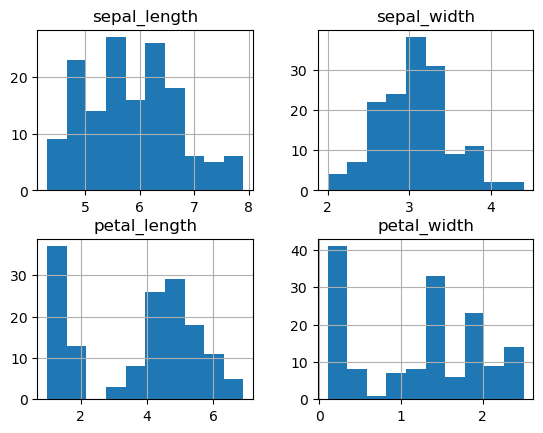

In [7]:
df.hist()

<Axes: >

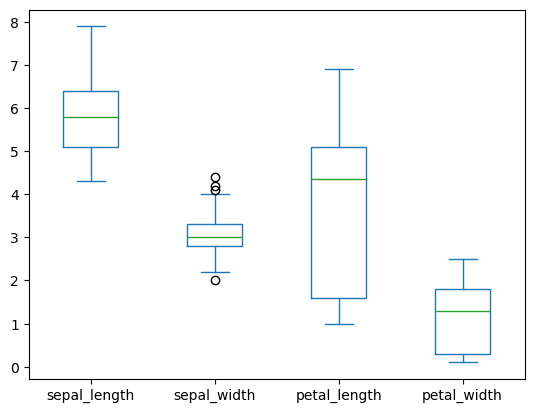

In [8]:
df.plot(kind='box')

In [9]:
species_counts = df['species'].value_counts().reset_index()
species_counts.columns = ['species', 'count']

<Axes: xlabel='species', ylabel='count'>

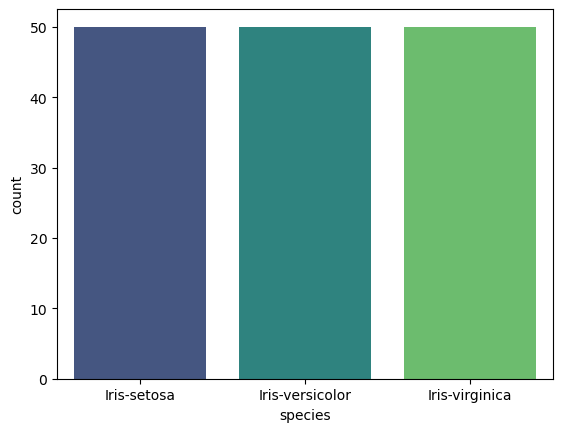

In [10]:
sns.barplot(x='species', y='count', data=species_counts, palette='viridis')

In [11]:
x= df.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y=df['species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,train_size=0.75, random_state=143)

In [15]:
xtrain.shape

(112, 4)

In [16]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred= model.predict(xtest)
    
    print(model.score(xtrain, ytrain))
    print(model.score(xtest,ytest))
    print(classification_report(ytest,ypred))

In [17]:
predict(KNeighborsClassifier(n_neighbors=5))

0.9732142857142857
0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        38
      macro avg       0.96      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [18]:
trainac=[]
testac=[]

for i in range(1,30):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred= knn.predict(xtest)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [19]:
data= pd.DataFrame({'Train Accuracy' :trainac,
     'Test Accuracy': testac})
data

,Train Accuracy,Test Accuracy
0,1.000000,0.947368
1,0.991071,0.921053
2,0.964286,0.947368
3,0.973214,0.947368
4,0.973214,0.973684
5,0.973214,0.973684
6,0.973214,0.973684
7,0.982143,0.947368
8,0.982143,0.947368
9,0.982143,0.947368


In [20]:
data['diff']= data['Train Accuracy']-data['Test Accuracy']
data[data['diff'] == min(data['diff'])]

,Train Accuracy,Test Accuracy,diff
4,0.973214,0.973684,-0.00047
5,0.973214,0.973684,-0.00047
6,0.973214,0.973684,-0.00047
17,0.973214,0.973684,-0.00047


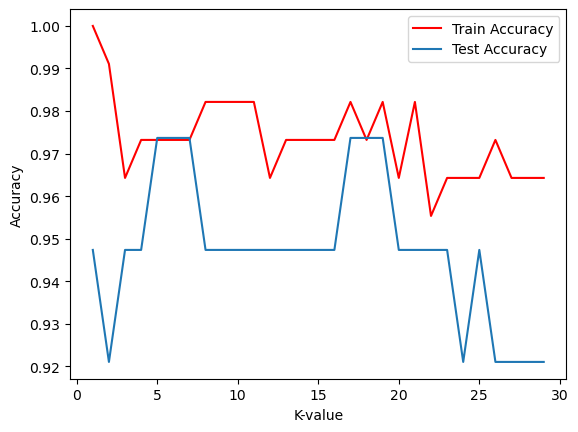

In [21]:
plt.plot(range(1,30),trainac,color='red', label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.legend()

In [48]:
predict(KNeighborsClassifier(n_neighbors=6))

0.9732142857142857
0.9736842105263158
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        38
      macro avg       0.96      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [50]:
predict(KNeighborsClassifier(n_neighbors=3))

0.9642857142857143
0.9473684210526315
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.95        38
      macro avg       0.93      0.96      0.94        38
   weighted avg       0.96      0.95      0.95        38

